<a href="https://colab.research.google.com/github/victorm0202/OP-2020-code/blob/master/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes neuronales convolucionales (CNN) con Keras**

In [ ]:
import keras
keras.__version__

'2.4.3'

## Usaremos como ejemplo, los famosísimos dígitos MNIST

In [ ]:
import  matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_lab), (test_images, test_lab) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_lab)
test_labels = to_categorical(test_lab)

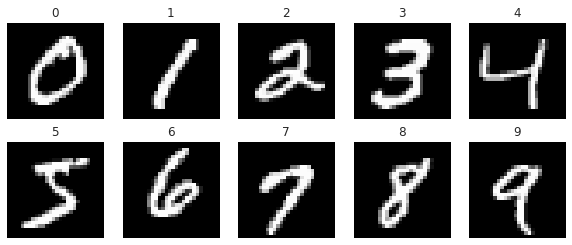

In [ ]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    idx = list(train_lab).index(i)
    plt.imshow(train_images[idx].reshape(28,28), 'gray')
    plt.title(train_lab[idx])
    plt.axis('off')
    
plt.show()

### Ajustamos una MLP para comparar resultados. Recuerda que en éste caso, las imágenes son tratadas como un vector de pixeles

In [ ]:
from keras import models
from keras import layers
import time

mlp = models.Sequential()
mlp.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
mlp.add(layers.Dense(10, activation='softmax'))

mlp.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
tic=time.time()
history = mlp.fit(train_images, train_labels, epochs=5, validation_split=0.0, batch_size=128)
print('Procesamiento: ', time.time()-tic,' seg')

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2541 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1034 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9893
Procesamiento:  6.566877126693726  seg


In [ ]:
test_loss, test_acc = mlp.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9790
test_acc: 0.9789999723434448


Para éste modelo simple, se obtiene una precisión no tan mala (0.979)

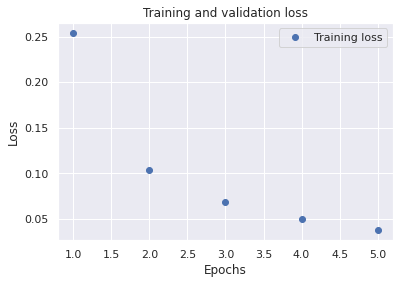

In [ ]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Ahora, ajustamos una CNN sencilla

Primero, debemos reformatear los arreglos de las imágenes, ya que en éste caso son tensores en 2D

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Puedes recurrir a la ayuda de Keras: https://keras.io/api/layers/convolution_layers para los parámetros de las capas de convolución.

In [ ]:
#del cnn1

cnn1 = models.Sequential()
# extraccion caracteristicas
cnn1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn1.add(layers.Conv2D(filters= 64, kernel_size=(3, 3), activation='relu'))
# capa densa
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(units= 64, activation='relu'))
cnn1.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)              

### Observa los parámetros a calcular y compáralos con la MLP ajustada antes...

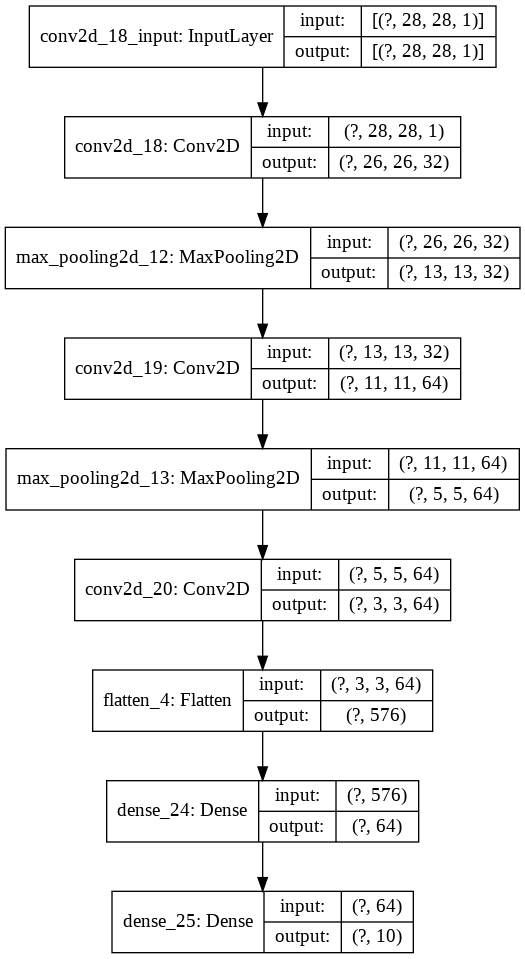

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn1, to_file='cnn1.png',show_shapes=True, show_layer_names=True)
Image(retina=True, filename='cnn1.png')

In [ ]:
cnn1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

tic=time.time()
history = cnn1.fit(train_images, train_labels, validation_split=0.0, epochs=5, batch_size=64)
print('Procesamiento: ', time.time()-tic,' seg')

Epoch 1/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9956
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0107 - accuracy: 0.9970
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0076 - accuracy: 0.9975
Procesamiento:  17.122966527938843  seg


### Compara su desempeño en la precisión de prueba

In [ ]:
test_loss, test_acc = cnn1.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9925
test_acc: 0.9925000071525574


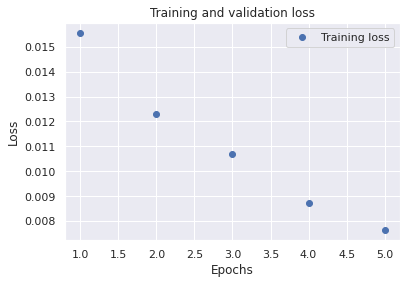

In [ ]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

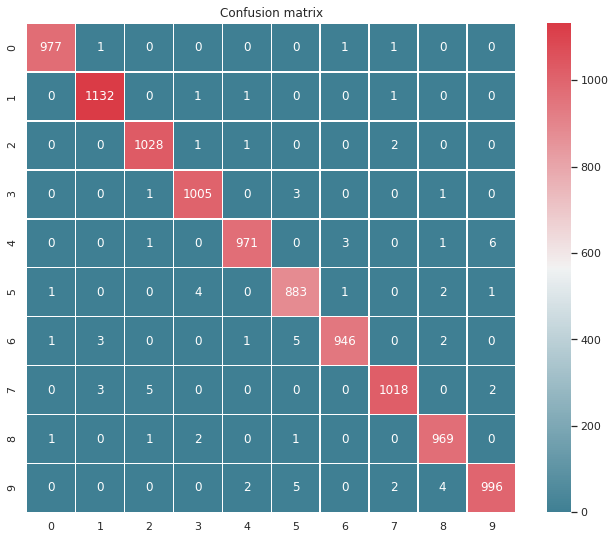

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np

classes = cnn1.predict(test_images)

test_true_labels = np.argmax(test_labels, axis=1)
test_predicted_labels = np.argmax(classes,axis=1)

C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Confusion matrix')

plt.show()